# Scikit-Learn 맛보기
### Iris 분류 - 결정 트리, 서포트벡터머신(SVM), 로지스틱 회귀

#### 1. 데이터 전처리

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
type(iris)

sklearn.utils.Bunch

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
# Feature data - X, numpy dimensional array
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [6]:
type(iris.data), iris.data.shape

(numpy.ndarray, (150, 4))

In [7]:
# Feature name
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
# Target data - y
iris.target[:5]

array([0, 0, 0, 0, 0])

In [10]:
import numpy as np
np.unique(iris.target, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50], dtype=int64))

In [11]:
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [13]:
# 설명
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [15]:
df.groupby('target').describe()

sepal length (cm)                                              \
                   count   mean       std  min    25%  50%  75%  max   
target                                                                 
0                   50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
1                   50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
2                   50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

       sepal width (cm)         ... petal length (cm)      petal width (cm)  \
                  count   mean  ...               75%  max            count   
target                          ...                                           
0                  50.0  3.428  ...             1.575  1.9             50.0   
1                  50.0  2.770  ...             4.600  5.1             50.0   
2                  50.0  2.974  ...             5.875  6.9             50.0   

                                                  
         mean       std  min  25%  50%  75%  max  
target                                            
0       0.246  0.105386  0.1  0.2  0.2  0.3  0.6  
1       1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
2       2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

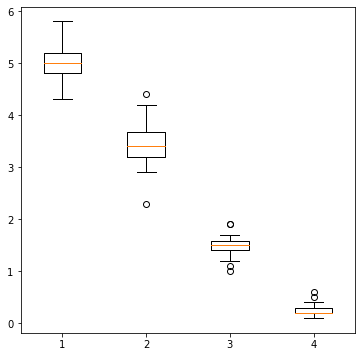

In [18]:
import matplotlib.pyplot as plt
setosa = df[df.target == 0].iloc[:,:-1]
plt.figure(figsize=(6,6))
plt.boxplot(setosa)
plt.show()

#### 2. 학습과 테스트 데이터로 분리

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=2021
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [20]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2]), array([36, 40, 44], dtype=int64))

In [21]:
# y값을 균일하게 뽑으려면
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify=iris.target, test_size=0.2, random_state=2021
)
np.unique(y_train, return_counts=True)

(array([0, 1, 2]), array([40, 40, 40], dtype=int64))

#### 3. 학습

- Decision Tree(결정 트리)

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
# 모델 생성 - 객체 생성
dtc = DecisionTreeClassifier(random_state=2021)

In [24]:
# 학습(훈련)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2021)

#### 4. 예측

In [25]:
pred_dt = dtc.predict(X_test)

In [27]:
res = pd.DataFrame({'y':y_test, 'DT':pred_dt})
res.head()

,y,DT
0,0,0
1,1,1
2,1,2
3,2,2
4,0,0


#### 5. 평가

In [28]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred_dt)
print(f'정확도(DT): {acc:.4f}')

정확도(DT): 0.9000


In [29]:
# 4, 5번을 한꺼번에 수행
dtc.score(X_test, y_test)

0.9

- 참고 사항: f-string

In [30]:
a = 1
b = 1.0
c = '문자열'
print(a, b, c)

1 1.0 문자열


In [31]:
print('정수:', a, ', 실수:', b, ',', c, '"1"')

정수: 1 , 실수: 1.0 , 문자열 "1"


In [32]:
print(f'정수: {a}, 실수: {b}, {c}: "1"')

정수: 1, 실수: 1.0, 문자열: "1"


In [39]:
print(f'정수: {a:03d}, 실수: {b:.2f}, {c:10s}: "1"')

정수: 001, 실수: 1.00, 문자열       : "1"
